# Data Exploration - Registered

In [353]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


In [354]:
df= pd.read_csv('train.csv')

In [355]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [356]:
df.shape

(10886, 12)

In [357]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [359]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


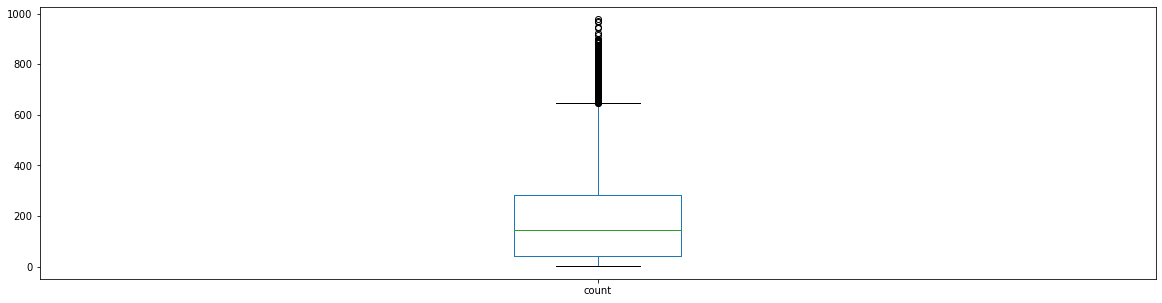

In [360]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,5)
df['count'].plot(kind = 'box')

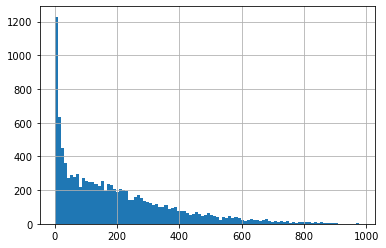

In [361]:
df['count'].hist(bins=100)

In [362]:
3*df['count'].std()

543.4333614908548

In [363]:
df[abs(df['count'] - df['count'].mean()) > 544]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
6659,2012-03-14 18:00:00,1,0,1,1,28.70,31.820,32,0.0000,102,647,749
6683,2012-03-15 18:00:00,1,0,1,1,27.06,31.060,44,19.0012,98,648,746
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,2012-10-18 08:00:00,4,0,1,1,18.86,22.725,82,16.9979,31,803,834
9944,2012-10-18 17:00:00,4,0,1,2,23.78,27.275,64,22.0028,102,788,890
9945,2012-10-18 18:00:00,4,0,1,2,22.96,26.515,64,22.0028,68,720,788
10519,2012-12-04 17:00:00,4,0,1,1,21.32,25.000,59,15.0013,43,700,743


In [364]:
df = df[abs(df['count'] - df['count'].mean()) < 3*df['count'].std()]

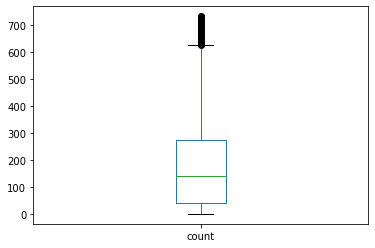

In [365]:
df['count'].plot(kind = 'box')

In [366]:
df['date_changed']= pd.to_datetime(df['datetime'])

In [367]:
df.index= df['date_changed']

In [368]:
df['hours']=df.date_changed.dt.hour
df['weekday']=df.date_changed.dt.weekday
df['month']=df.date_changed.dt.month
df['year']=df.date_changed.dt.year

In [369]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date_changed,hours,weekday,month,year
date_changed,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,0,5,1,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,1,5,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2,5,1,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,3,5,1,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,4,5,1,2011


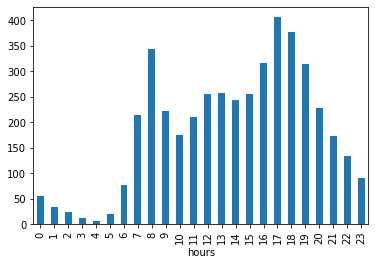

In [370]:
df.groupby('hours')['count'].mean().plot(kind = 'bar')

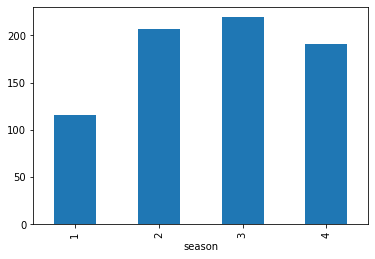

In [371]:
df.groupby('season')['count'].mean().plot(kind='bar')

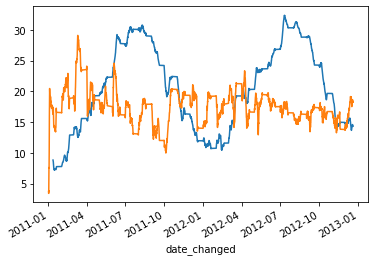

In [372]:
df['temp'].rolling(250).mean().plot()
#df['windspeed'].rolling(250).mean().plot()
#df['casual'].rolling(250).mean().plot()
#df['registered'].rolling(250).mean().plot()
#df['count'].rolling(250).mean().plot()
df['humidity'].rolling(250, min_periods=10).std().plot()
#df['month'].rolling(250).mean().plot()

In [373]:
df.groupby('season').describe()

holiday                                              workingday  \
         count      mean       std  min  25%  50%  75%  max      count   
season                                                                   
1       2682.0  0.026473  0.160566  0.0  0.0  0.0  0.0  1.0     2682.0   
2       2694.0  0.017817  0.132312  0.0  0.0  0.0  0.0  1.0     2694.0   
3       2664.0  0.036036  0.186415  0.0  0.0  0.0  0.0  1.0     2664.0   
4       2699.0  0.035569  0.185247  0.0  0.0  0.0  0.0  1.0     2699.0   

                  ... month          year                                 \
            mean  ...   75%   max   count         mean       std     min   
season            ...                                                      
1       0.680089  ...   3.0   3.0  2682.0  2011.506711  0.500048  2011.0   
2       0.688196  ...   6.0   6.0  2694.0  2011.492576  0.500038  2011.0   
3       0.667417  ...   9.0   9.0  2664.0  2011.487613  0.499940  2011.0   
4       0.671360  ...  12.0  12.0  2699.0  2011.493516  0.500051  2011.0   

                                        
           25%     50%     75%     max  
season                                  
1       2011.0  2012.0  2012.0  2012.0  
2       2011.0  2011.0  2012.0  2012.0  
3       2011.0  2011.0  2012.0  2012.0  
4       2011.0  2011.0  2012.0  2012.0  

[4 rows x 112 columns]

In [376]:
import seaborn as sns

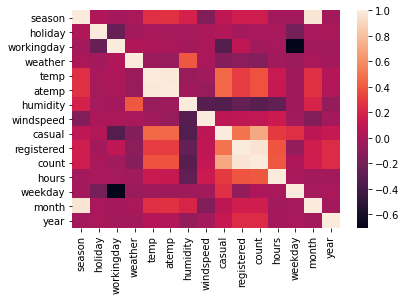

In [377]:
ax = sns.heatmap(df.corr())

### out goes atemp

In [378]:
df.drop(['atemp'],axis=1,inplace=True)

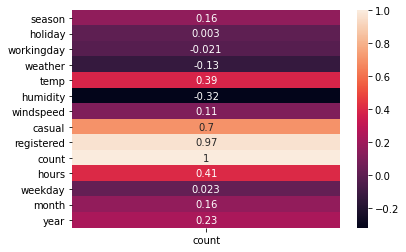

In [379]:
x=df.corr()
count=pd.DataFrame(x['count'])
sns.heatmap(count,annot=True)

### out goes holiday, working day!
### windspeed is a difficult one..but for simplicity it's going..

In [380]:
df.drop(['holiday'],axis=1,inplace=True)
df.drop(['workingday'],axis=1,inplace=True)
#df.drop(['windspeed'],axis=1,inplace=True)
# datetime is not needed either
df.drop(['datetime'],axis=1,inplace=True)

In [381]:
df.columns

Index(['season', 'weather', 'temp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'date_changed', 'hours', 'weekday', 'month',
       'year'],
      dtype='object')

In [382]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_test,pred):
    y_test=np.array(y_test)
    pred=np.array(pred)
    y_test[y_test<0]=0
    pred[pred<0]=0
    return np.sqrt(mean_squared_log_error(y_test,pred))

In [383]:
from sklearn.metrics import make_scorer

RMSLE_scorer = make_scorer(RMSLE)

In [384]:
df_test= pd.read_csv('test.csv')

df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [385]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [388]:
df_test['hours']=df_test.datetime.dt.hour
df_test['weekday']=df_test.datetime.dt.weekday
df_test['month']=df_test.datetime.dt.month
df_test['year']=df_test.datetime.dt.year

In [393]:
# Registered
#--------------

X_reg = df[['season', 'weather', 'temp', 'humidity',
        'hours', 'weekday', 'month', 'year','windspeed']]

y_reg = df['registered']


pipe_1 = make_pipeline(
    (StandardScaler()),
    (PolynomialFeatures(interaction_only=False, degree = 3))
)

pipe_2 = make_pipeline(
    (StandardScaler()),
    (PolynomialFeatures(interaction_only=False, degree = 3))
)

preprocessing2 = make_column_transformer(
    (OneHotEncoder(sparse = False, handle_unknown = 'ignore' ), ['season', 'weather', 'month','hours','year', 'weekday']),
    (pipe_1, ['temp'],
     pipe_2, ['humidity','windspeed'])
)

model_DumR = make_pipeline(
preprocessing2, 
DummyRegressor()
)

model_DTR = make_pipeline(
preprocessing2, 
DecisionTreeRegressor(max_depth=None)
)

model_LR = make_pipeline(
preprocessing2, 
LinearRegression()
)

model_PR = make_pipeline(
preprocessing2, 
PoissonRegressor()
)

model_GBR = make_pipeline(
preprocessing2, 
GradientBoostingRegressor()
)

model_RF = make_pipeline(
preprocessing2, 
RandomForestRegressor()
)
 


## Cross-Validation
### Linear Regression 

In [394]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    estimator = model_LR, 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.090190,0.006913,1.409134,1.053860
1,0.057213,0.009136,1.132841,1.126182
2,0.047246,0.006013,1.289914,1.097851
3,0.086300,0.008730,1.005164,1.089660
4,0.083508,0.007152,1.033657,1.082510


### DecisionTreeRegressor

In [395]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    estimator = DecisionTreeRegressor(max_depth=None), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.028897,0.002300,0.823035,0.010246
1,0.027941,0.002036,0.460327,0.010215
2,0.027966,0.002179,0.521912,0.001069
3,0.039762,0.003319,0.470197,0.010235
4,0.037933,0.003269,0.538328,0.010230


### Poisson Regressor

In [396]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    estimator = PoissonRegressor(), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.082959,0.002008,1.571465,1.221860
1,0.109616,0.001742,1.311560,1.263818
2,0.088213,0.002861,1.289294,1.216559
3,0.095779,0.001764,1.139608,1.222820
4,0.081264,0.001792,1.098514,1.247952


### RandomForestRegressor

In [397]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    estimator = RandomForestRegressor(), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,2.220633,0.034591,0.797156,0.149535
1,2.340045,0.025798,0.370047,0.153988
2,2.367018,0.027957,0.465579,0.154578
3,2.122051,0.028728,0.344655,0.158458
4,2.053785,0.030912,0.360228,0.157838


### GradientBoostingRegressor

In [398]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    estimator = GradientBoostingRegressor(), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.598013,0.002922,0.906816,0.602197
1,0.572153,0.002944,0.669840,0.735000
2,0.505244,0.002974,0.764806,0.685014
3,0.513771,0.004753,0.698712,0.693025
4,0.516526,0.004829,0.652629,0.731442


## GridSearch for selected models

In [399]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_test,pred):
    y_test=np.array(y_test)
    pred=np.array(pred)
    y_test[y_test<0]=0
    pred[pred<0]=0
    return np.sqrt(mean_squared_log_error(y_test,pred))

In [400]:
from sklearn.metrics import make_scorer

RMSLE_scorer = make_scorer(RMSLE, greater_is_better=False)

### DecistionTreeRegressor

In [401]:
from sklearn.model_selection import GridSearchCV
model_DTR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'decisiontreeregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__pipeline', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__standardscaler', 'columntransformer__pipeline__polynomialfeatures', 'columntransformer__pipeline__standardscaler__copy', 'columntransformer__pipeline__standardscaler__with_mean', 'columntransformer__pipeline__standardscaler__with_std', 'columntransformer__pipelin

In [402]:
model_DTR.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['season', 'weather', 'month', 'hours', 'year',
                                     'weekday']),
                                   ('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures(degree=3))]),
                                    ['temp'])])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
  

In [403]:
DTR_grid = {
    'decisiontreeregressor__max_depth':[2, 4,8,16,32,64,128]#,
   #'decisiontreeregressor__min_samples_split':[2,3,4,5,6],
    #'decisiontreeregressor__max_leaf_nodes':[8,10,12]
}

In [404]:
cv = GridSearchCV(
    estimator=model_DTR,
    param_grid=DTR_grid,
    scoring=RMSLE_scorer, # use your own scorer with the make_scorer function
    cv=10, return_train_score=True
)

In [405]:
cv.fit(X_reg, y_reg)
cv_results = pd.DataFrame(cv.cv_results_)

In [406]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_decisiontreeregressor__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [407]:
cv_results[[
    'rank_test_score',
    'mean_test_score', 
    'mean_train_score',
    'param_decisiontreeregressor__max_depth']]

,rank_test_score,mean_test_score,mean_train_score,param_decisiontreeregressor__max_depth
0,7,-1.476921,-1.462042,2
1,6,-1.414299,-1.385620,4
2,5,-1.169750,-1.108411,8
3,4,-0.617816,-0.483166,16
4,1,-0.534770,-0.074985,32
5,3,-0.541372,-0.053650,64
6,2,-0.536128,-0.053650,128


### RandomForest

In [408]:
model_RF.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__pipeline', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__standardscaler', 'columntransformer__pipeline__polynomialfeatures', 'columntransformer__pipeline__standardscaler__copy', 'columntransformer__pipeline__standardscaler__with_mean', 'columntransformer__pipeline__standardscaler__with_std', 'columntransformer__pipelin

In [409]:
model_RF.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['season', 'weather', 'month', 'hours', 'year',
                                     'weekday']),
                                   ('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures(degree=3))]),
                                    ['temp'])])),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
  

In [410]:
DRF_grid = {
    'randomforestregressor__n_estimators':[250,500],
    'randomforestregressor__max_depth':[32,64]#,
    #'randomforestregressor__min_samples_leaf':[1,2,4]
}

In [411]:
cv = GridSearchCV(
    estimator = model_RF,
    param_grid = DRF_grid,
    scoring = RMSLE_scorer, # use your own scorer with the make_scorer function
    cv = 10, return_train_score=True, verbose=10
)

In [412]:
#cv.fit(X_reg, y_reg)
#cv_results = pd.DataFrame(cv.cv_results_)

In [413]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_decisiontreeregressor__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [414]:
'''##''cv_results[[
    'rank_test_score',
    'mean_test_score', 
    'mean_train_score',
    'param_randomforestregressor__n_estimators',
    'param_randomforestregressor__max_depth']]
    '''

"##''cv_results[[\n    'rank_test_score',\n    'mean_test_score', \n    'mean_train_score',\n    'param_randomforestregressor__n_estimators',\n    'param_randomforestregressor__max_depth']]\n    "

### result: best was 250 estimators,64 max_depth,min_sample_leaf=1

#### FINAL - COUNT


In [415]:
cv_results = cross_validate(
    estimator = RandomForestRegressor(n_estimators=250,max_depth=64, min_samples_leaf=1), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,5.977501,0.097627,-0.796647,-0.149794
1,5.769102,0.077106,-0.373075,-0.152233
2,5.989587,0.094405,-0.463632,-0.153916
3,5.710295,0.098411,-0.346120,-0.159995
4,5.691983,0.081077,-0.359981,-0.157558


In [416]:
cv_results = cross_validate(
    estimator = DecisionTreeRegressor(max_depth=32), 
    X = X_reg, 
    y = y_reg, 
    cv = 5, 
    scoring = RMSLE_scorer, 
    return_train_score = True, n_jobs = -1
)

cv_results=pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.051832,0.003145,-0.820485,-0.010246
1,0.053525,0.003199,-0.454216,-0.010215
2,0.057546,0.002100,-0.540789,-0.001069
3,0.054640,0.002038,-0.463344,-0.010235
4,0.044725,0.002049,-0.482445,-0.010230


## Kaggle Test Data 

In [417]:
df_test= pd.read_csv('test.csv')
df_test.head()
#X_test = df_test[['season','holiday','workingday','weather','atemp','humidity','windspeed']]
#X_test.columns


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [418]:
#df_test= pd.read_csv('test.csv')

In [419]:
#for kaggle
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['hours'] = df_test.datetime.dt.hour
df_test['weekday'] = df_test.datetime.dt.weekday
df_test['month'] = df_test.datetime.dt.month
df_test['year'] = df_test.datetime.dt.year
X_test = df_test[['season', 'weather', 'temp', 'humidity',
         'hours', 'weekday', 'month', 'year','windspeed']]

In [420]:


#model_DTR.fit(X_reg,y_reg)
#y_dtr_pred=model_DTR.predict(X_test)
#y_pred=y_dtr_pred

model_RF.fit(X_reg,y_reg)
y_rf_pred=model_RF.predict(X_test)
y_pred=y_rf_pred


In [421]:
#y_pred=y_dtr_pred

In [422]:
y_pred= pd.DataFrame(y_pred)

In [423]:
y_pred.head()

,0
0,9.73
1,3.24
2,2.26
3,2.59
4,2.06


In [424]:
y_pred[y_pred[0]<0]=0

In [425]:
y_pred[y_pred[0]<0]

,0


In [426]:
y_pred.shape

(6493, 1)

In [427]:
y_pred

,0
0,9.730000
1,3.240000
2,2.260000
3,2.590000
4,2.060000
...,...
6488,180.440000
6489,141.140000
6490,113.533333
6491,83.550000


In [428]:
len(df_test['datetime'])

6493

In [429]:
len(y_pred)

6493

In [430]:
y_pred[0] # registered

0         9.730000
1         3.240000
2         2.260000
3         2.590000
4         2.060000
           ...    
6488    180.440000
6489    141.140000
6490    113.533333
6491     83.550000
6492     45.860000
Name: 0, Length: 6493, dtype: float64

### addition of the casual results

In [431]:
df_casual= pd.read_csv('casual.csv')

In [432]:
y_pred[0]

0         9.730000
1         3.240000
2         2.260000
3         2.590000
4         2.060000
           ...    
6488    180.440000
6489    141.140000
6490    113.533333
6491     83.550000
6492     45.860000
Name: 0, Length: 6493, dtype: float64

In [433]:
df_casual['0']

0       2.043333
1       1.143333
2       1.513333
3       0.914500
4       0.150000
          ...   
6488    7.840000
6489    5.470000
6490    3.865000
6491    3.030000
6492    1.890000
Name: 0, Length: 6493, dtype: float64

In [434]:
y_pred = y_pred[0] + df_casual['0']
y_pred

0        11.773333
1         4.383333
2         3.773333
3         3.504500
4         2.210000
           ...    
6488    188.280000
6489    146.610000
6490    117.398333
6491     86.580000
6492     47.750000
Length: 6493, dtype: float64

In [435]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'datetime':df_test['datetime'],'count':y_pred})

#Visualize the first 5 rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.773333
1,2011-01-20 01:00:00,4.383333
2,2011-01-20 02:00:00,3.773333
3,2011-01-20 03:00:00,3.504500
4,2011-01-20 04:00:00,2.210000


In [436]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
